# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [2]:
df_new=pd.read_excel('time.xlsx')

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

Drop the original last column

In [3]:
df_new=df_new.iloc[:,:-1]

In [4]:
df_new=df_new.drop(columns=['TIME'])

In [5]:
df_new

,T,G,P
0,3,0.0,0.0
1,3,0.0,0.0
2,3,0.0,0.0
3,3,0.0,0.0
4,3,0.0,0.0
...,...,...,...
97195,21,0.0,0.0
97196,21,0.0,0.0
97197,21,0.0,0.0
97198,21,0.0,0.0


In [6]:
df_new.loc[(df_new['G'] > df_new['P']) & (df_new['P'] < df_new['G']), 'ratio'] = df_new['ratio'] = df_new['G'] / df_new['P']
df_new.loc[(df_new['G'] < df_new['P']) & (df_new['P'] > df_new['G']), 'ratio'] = df_new['ratio'] = df_new['P'] / df_new['G']

In [7]:
df_new

,T,G,P,ratio
0,3,0.0,0.0,NaN
1,3,0.0,0.0,NaN
2,3,0.0,0.0,NaN
3,3,0.0,0.0,NaN
4,3,0.0,0.0,NaN
...,...,...,...,...
97195,21,0.0,0.0,NaN
97196,21,0.0,0.0,NaN
97197,21,0.0,0.0,NaN
97198,21,0.0,0.0,NaN


In [8]:
df_new.isnull().sum()

T            0
G            0
P            0
ratio    44233
dtype: int64

In [9]:
df = df_new.dropna(how='any',axis=0) 

In [10]:
df

,T,G,P,ratio
135,6,0.008667,0.018119,2.090618
136,6,0.164500,0.369489,2.246134
137,6,0.717500,1.601420,2.231944
138,6,0.902167,1.973920,2.187976
139,6,1.086000,2.448440,2.254549
...,...,...,...,...
97055,19,0.406667,0.091648,0.225365
97056,19,0.387167,0.083782,0.216397
97057,19,0.396667,0.087320,0.220133
97058,19,0.189333,0.042822,0.226173


In [11]:
m = df['T'].between(8,16,inclusive=False)
g = m.ne(m.shift()).cumsum()
df['r_new'] = df.groupby(g)['ratio'].transform('mean')
export=df.to_excel(r'C:\Users\zahid.hussain\nn.xlsx', index=None, header=True)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df

,T,G,P,ratio,r_new
135,6,0.008667,0.018119,2.090618,2.194815
136,6,0.164500,0.369489,2.246134,2.194815
137,6,0.717500,1.601420,2.231944,2.194815
138,6,0.902167,1.973920,2.187976,2.194815
139,6,1.086000,2.448440,2.254549,2.194815
...,...,...,...,...,...
97055,19,0.406667,0.091648,0.225365,0.219816
97056,19,0.387167,0.083782,0.216397,0.219816
97057,19,0.396667,0.087320,0.220133,0.219816
97058,19,0.189333,0.042822,0.226173,0.219816


In [13]:
df_r= df.loc[(df['T'] > 8) & (df['T'] < 16)]

In [14]:
km=KMeans(n_clusters=10,random_state=325)
y_pred=km.fit_predict(df_r[['r_new']])

In [15]:
df_r['cluster']=y_pred

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_r

,T,G,P,ratio,r_new,cluster
306,9,133.609,307.3560,2.300414,2.200728,0
307,9,134.049,302.3410,2.255451,2.200728,0
308,9,134.612,301.5010,2.239778,2.200728,0
309,9,135.299,295.0560,2.180770,2.200728,0
310,9,135.646,299.6570,2.209110,2.200728,0
...,...,...,...,...,...,...
96841,15,244.799,56.5070,0.230830,0.220369,3
96842,15,243.040,53.8277,0.221477,0.220369,3
96843,15,242.324,50.8073,0.209667,0.220369,3
96844,15,241.094,53.5239,0.222004,0.220369,3


In [17]:
df_r.loc[df_r['r_new'].idxmax()]

T            9.000000
G          144.779000
P          308.611000
ratio        2.131601
r_new        2.204009
cluster      0.000000
Name: 8946, dtype: float64

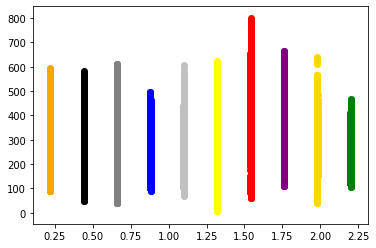

In [18]:
df0=df_r[df_r.cluster==0]
df1=df_r[df_r.cluster==1]
df2=df_r[df_r.cluster==2]
df3=df_r[df_r.cluster==3]
df4=df_r[df_r.cluster==4]
df5=df_r[df_r.cluster==5]
df6=df_r[df_r.cluster==6]
df7=df_r[df_r.cluster==7]
df8=df_r[df_r.cluster==8]
df9=df_r[df_r.cluster==9]



plt.scatter(df0.r_new,df0.G, color='green')
plt.scatter(df1.r_new,df1.G, color='blue')
plt.scatter(df2.r_new,df2.G, color='red')
plt.scatter(df3.r_new,df3.G, color='orange')
plt.scatter(df4.r_new,df4.G, color='yellow')
plt.scatter(df5.r_new,df5.G, color='grey')
plt.scatter(df6.r_new,df6.G, color='purple')
plt.scatter(df7.r_new,df7.G, color='black')
plt.scatter(df8.r_new,df8.G, color='silver')
plt.scatter(df9.r_new,df9.G, color='gold')

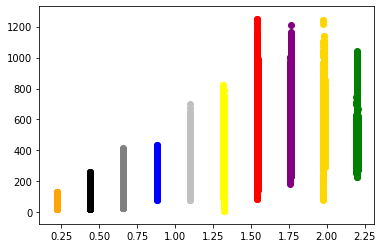

In [73]:
df0=df_r[df_r.cluster==0]
df1=df_r[df_r.cluster==1]
df2=df_r[df_r.cluster==2]
df3=df_r[df_r.cluster==3]
df4=df_r[df_r.cluster==4]
df5=df_r[df_r.cluster==5]
df6=df_r[df_r.cluster==6]
df7=df_r[df_r.cluster==7]
df8=df_r[df_r.cluster==8]
df9=df_r[df_r.cluster==9]



plt.scatter(df0.r_new,df0.P, color='green')
plt.scatter(df1.r_new,df1.P, color='blue')
plt.scatter(df2.r_new,df2.P, color='red')
plt.scatter(df3.r_new,df3.P, color='orange')
plt.scatter(df4.r_new,df4.P, color='yellow')
plt.scatter(df5.r_new,df5.P, color='grey')
plt.scatter(df6.r_new,df6.P, color='purple')
plt.scatter(df7.r_new,df7.P, color='black')
plt.scatter(df8.r_new,df8.P, color='silver')
plt.scatter(df9.r_new,df9.P, color='gold')

In [19]:
km=KMeans(n_clusters=10,random_state=325)
y_pred=km.fit_predict(df[['ratio']])

In [20]:
df['cluster']=y_pred

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df

,T,G,P,ratio,r_new,cluster
135,6,0.008667,0.018119,2.090618,2.194815,3
136,6,0.164500,0.369489,2.246134,2.194815,3
137,6,0.717500,1.601420,2.231944,2.194815,3
138,6,0.902167,1.973920,2.187976,2.194815,3
139,6,1.086000,2.448440,2.254549,2.194815,3
...,...,...,...,...,...,...
97055,19,0.406667,0.091648,0.225365,0.219816,4
97056,19,0.387167,0.083782,0.216397,0.219816,4
97057,19,0.396667,0.087320,0.220133,0.219816,4
97058,19,0.189333,0.042822,0.226173,0.219816,4


In [22]:
df.loc[df['ratio'].idxmax()]

T           10.000000
G          185.193000
P          427.791000
ratio        2.309974
r_new        2.194048
cluster      3.000000
Name: 3254, dtype: float64

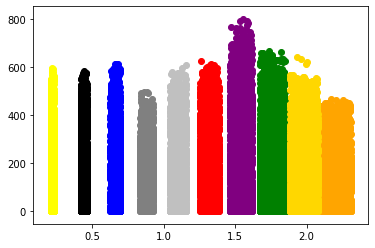

In [23]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]



plt.scatter(df0.ratio,df0.G, color='green')
plt.scatter(df1.ratio,df1.G, color='blue')
plt.scatter(df2.ratio,df2.G, color='red')
plt.scatter(df3.ratio,df3.G, color='orange')
plt.scatter(df4.ratio,df4.G, color='yellow')
plt.scatter(df5.ratio,df5.G, color='grey')
plt.scatter(df6.ratio,df6.G, color='purple')
plt.scatter(df7.ratio,df7.G, color='black')
plt.scatter(df8.ratio,df8.G, color='silver')
plt.scatter(df9.ratio,df9.G, color='gold')


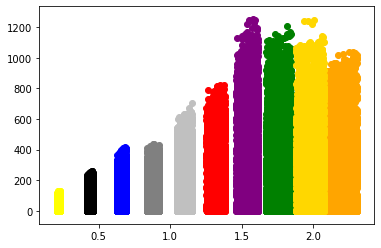

In [24]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df3=df[df.cluster==3]
df4=df[df.cluster==4]
df5=df[df.cluster==5]
df6=df[df.cluster==6]
df7=df[df.cluster==7]
df8=df[df.cluster==8]
df9=df[df.cluster==9]



plt.scatter(df0.ratio,df0.P, color='green')
plt.scatter(df1.ratio,df1.P, color='blue')
plt.scatter(df2.ratio,df2.P, color='red')
plt.scatter(df3.ratio,df3.P, color='orange')
plt.scatter(df4.ratio,df4.P, color='yellow')
plt.scatter(df5.ratio,df5.P, color='grey')
plt.scatter(df6.ratio,df6.P, color='purple')
plt.scatter(df7.ratio,df7.P, color='black')
plt.scatter(df8.ratio,df8.P, color='silver')
plt.scatter(df9.ratio,df9.P, color='gold')